### PROJET : PRÉDICTION DE PROBABILITÉ D'INONDATION


Ce projet s’inscrit dans le cadre d’un travail pratique en Intelligence Artificielle portant sur la comparaison de modèles de régression supervisée.

À partir d’un dataset de grande taille (plus de 1 000 observations et plus de 10 variables explicatives), nous avons étudié la prédiction du risque d’inondation en fonction de facteurs climatiques, hydrologiques et environnementaux.

Deux approches de modélisation ont été mises en œuvre :

- La régression linéaire multiple, utilisée comme modèle de référence interprétable,

- L’algorithme Random Forest Regressor, afin de capturer les relations non linéaires et les interactions complexes entre variables.

Le projet couvre l’ensemble du pipeline de data science :

- Nettoyage et préparation des données,

- Analyse exploratoire,

- Entraînement des modèles,

- Évaluation des performances (MSE, RMSE, R²),

- Comparaison critique des résultats obtenus.

L’objectif final est d’identifier le modèle le plus adapté à la prédiction des inondations et de discuter les notions de bias, variance, underfitting et overfitting dans un contexte réel.

### PROBLÉMATIQUE DU PROJET

#### Contexte et enjeux

Les inondations sont des catastrophes naturelles qui touchent des millions de personnes chaque année, causant des pertes humaines, des dégâts matériels et des perturbations économiques. Face à l’augmentation de la fréquence et de l’intensité des événements extrêmes liée au changement climatique, la capacité à prédire et anticiper les risques d’inondation devient un enjeu majeur pour la gestion des risques et la protection des populations.

#### Problématique principale

Comment peut-on développer un modèle de Machine Learning capable de prédire avec précision la probabilité d’inondation en se basant sur un ensemble de facteurs environnementaux, infrastructurels et socio-politiques ?

#### Objectifs du projet
Objectif principal : 
- Développer un modèle prédictif fiable pour estimer la probabilité d’inondation à partir de 20 variables explicatives.

Objectifs spécifiques :
- Analyser les corrélations entre les variables explicatives et la variable cible
- Comparer plusieurs algorithmes de Machine Learning
- Évaluer les performances des modèles
- Identifier les variables les plus importantes pour la prédiction
- Diagnostiquer les problèmes de biais, variance, sous-ajustement et surapprentissage


### PRÉSENTATION DU DATASET
#### Bibliothèque necessaire

In [1]:
import pandas as pd # Manipulation et analyse de données
import numpy as np # Calculs numériques
import matplotlib.pyplot as plt # Visualisation de données
import seaborn as sns # Visualisation de données avancée
from sklearn.model_selection import train_test_split # Division des données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler # Normalisation des données
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Modèles de régression linéaire
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Modèles d'ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Évaluation des modèles
from sklearn.model_selection import cross_val_score # Validation croisée
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
        
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#### Chargement des données

In [3]:
# Dataset d'entraînement
train_df = pd.read_csv('datasets/train.csv')

# Dataset de test
test_df = pd.read_csv('datasets/test.csv')

# Affichage des premières lignes du dataset d'entraînement
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


#### Informations générales sur le dataset

In [4]:
# Préparer les variables explicatives
feature_cols = [col for col in train_df.columns if col not in ['id', 'FloodProbability']]

print(f"Dataset: {len(train_df):,} observations, {len(feature_cols)} variables explicatives")
print(f"Valeurs manquantes: {train_df.isnull().sum().sum()}")

train_df.describe()

Dataset: 1,117,957 observations, 20 variables explicatives
Valeurs manquantes: 0


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


#### Distribution de la variable cible

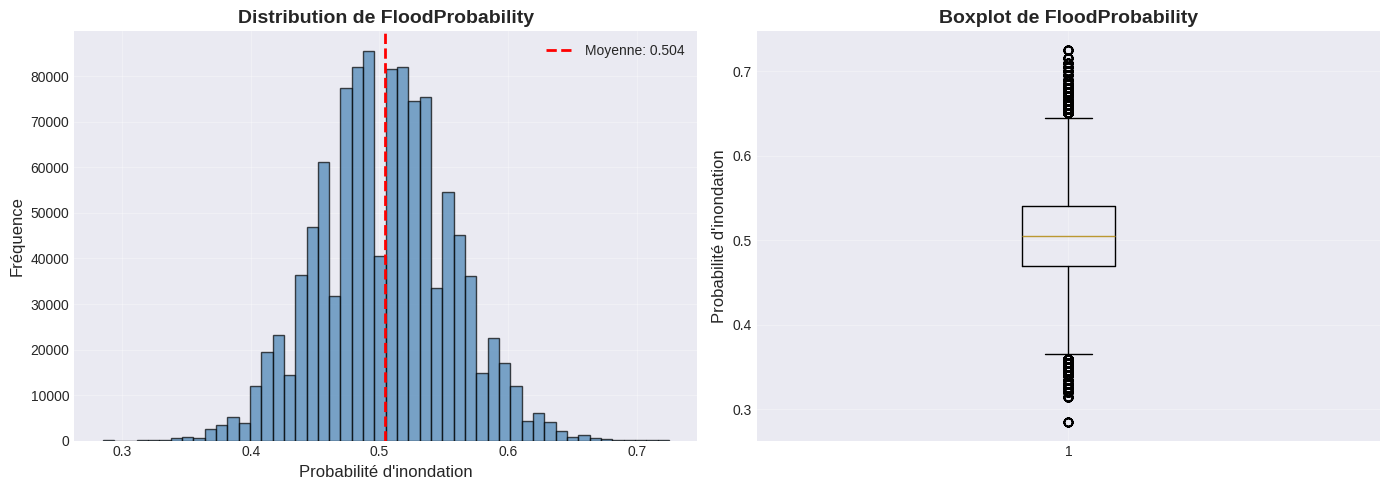

In [5]:
# Distribution de la variable cible
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['FloodProbability'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Probabilité d\'inondation', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution de FloodProbability', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(train_df['FloodProbability'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Moyenne: {train_df["FloodProbability"].mean():.3f}')
axes[0].legend()

axes[1].boxplot(train_df['FloodProbability'], vert=True)
axes[1].set_ylabel('Probabilité d\'inondation', fontsize=12)
axes[1].set_title('Boxplot de FloodProbability', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()